In [1]:
"""
Usar ransaparencias es util pero si tenemos millones de datos no pondemos ver diferencias
hayq ue usar otro metodo que combina densidad con histogramas, es como un grafico topografico.
"""

'\nUsar ransaparencias es util pero si tenemos millones de datos no pondemos ver diferencias\nhayq ue usar otro metodo que combina densidad con histogramas, es como un grafico topografico.\n'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

In [3]:
url = 'Automobile price data _Raw_.csv'
data = pd.read_csv(url)
data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
##Creamos una funcion que elimina los guiones de la cabecea.
def elimina_guiones(data):
    columnas = data.columns
    data.columns = [str.replace('-','_') for str in columnas]

In [8]:
elimina_guiones(data)
data.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

In [18]:
##creamos una funcion que elimina los numero faltantes y lo que queda lo convierte a numerico.
def convierte_a_numerico(data):
    import pandas as pd
    import numpy as np
    
    columnas = ['price', 'bore', 'stroke', 'horsepower', 'peak_rpm']
    
    for col in columnas:
        data.loc[data[col]=='?',col]=np.nan
        data[col].dropna(axis=0,inplace=True)
        
    for col in columnas:
        data[col] = pd.to_numeric(data[col])

In [19]:
convierte_a_numerico(data)

In [20]:
data.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

In [32]:
## creamos un grafico de densidad con seabron para una visualizacion topografica de millones de puntos
## existen dos formas de hacerlo una con kind = kde y otra con hex.

def crea_vis_sea_topo(data, x_col, y_col='price', kind = 'kde'):
    for col in x_col:
        sea.set_style('whitegrid')
        sea.jointplot(col, y_col,data, kind=kind)
        plt.title('grafico de columna ' + col + ' vs ' + y_col)
        plt.ylabel(y_col)
        plt.xlabel(col)
        plt.show()

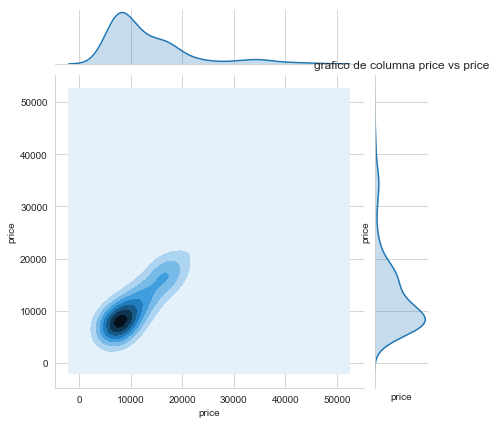

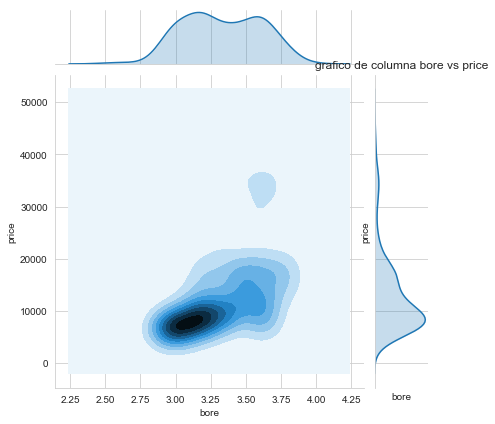

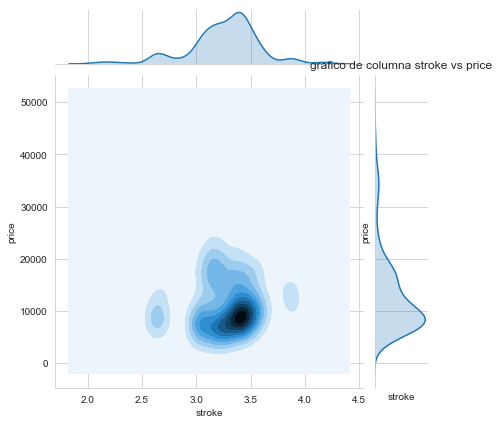

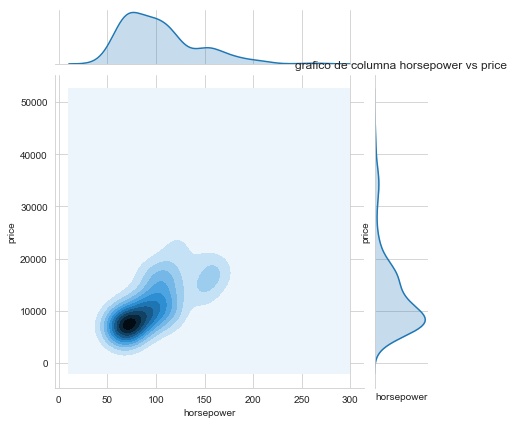

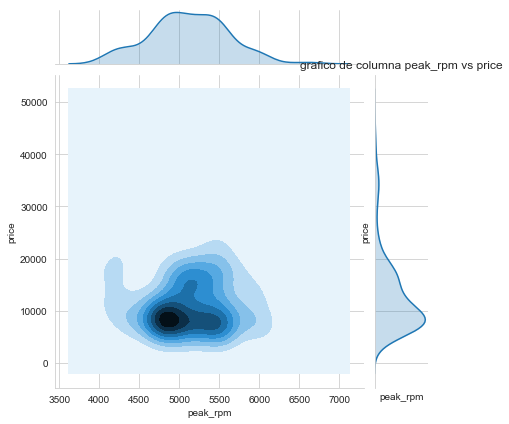

In [33]:
columnas = ['price', 'bore', 'stroke', 'horsepower', 'peak_rpm']
crea_vis_sea_topo(data,columnas)

In [37]:
def crea_vis_sea_topo_2(data, x_col, y_col='price',kind = 'hex'):
    for col in x_col:
        sea.set_style('darkgrid')
        sea.jointplot(col,y_col,data,kind=kind)
        plt.title('Columna ' + col + ' vs ' + y_col)
        plt.xlabel(col)
        plt.ylabel(y_col)
        plt.show()

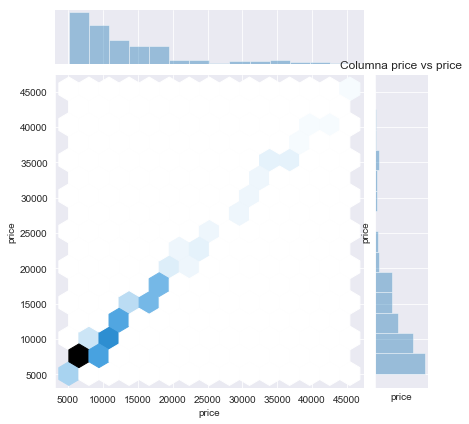

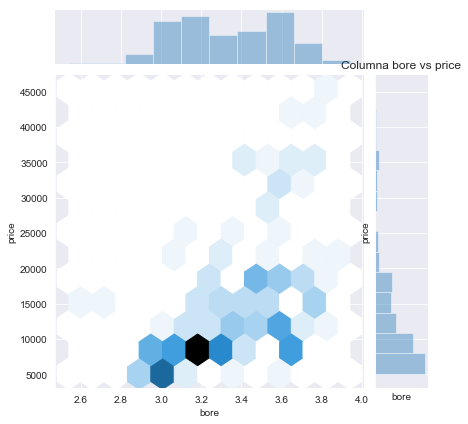

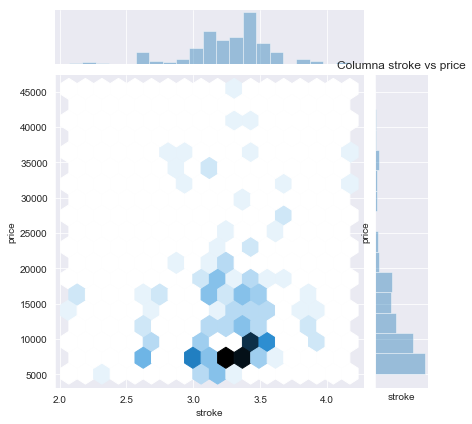

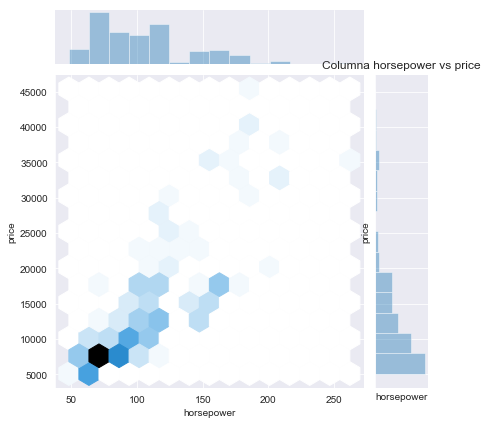

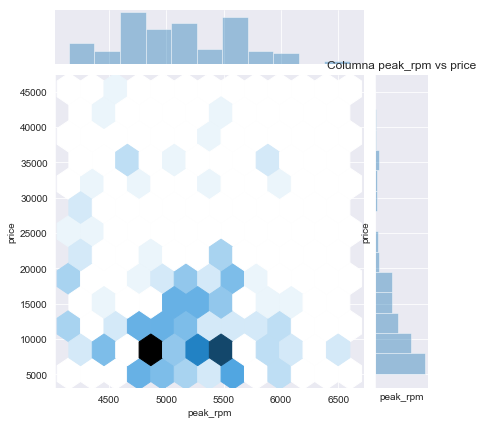

In [38]:
columnas = ['price', 'bore', 'stroke', 'horsepower', 'peak_rpm']
crea_vis_sea_topo_2(data,columnas)